### Firstly, we wrote our environment and dataset

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MetroPT3/MetroPT3(AirCompressor).csv')
df.head(5)


Mounted at /content/drive


<ipython-input-1-ddcfc18259a5>:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/MetroPT3/MetroPT3(AirCompressor).csv')


,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


### data needs to be labeled

In [ ]:
# airleak column adding
airleak_dates = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00')
]

df['airleak'] = 0
for start_date, end_date in airleak_dates:
    df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date), 'airleak'] = 1

# airleakmaint column adding
airleakmaint_dates = [
    ('2020-04-30 12:00:00', '2020-04-30 12:01:00'),
    ('2020-06-08 16:00:00', '2020-06-08 16:01:00'),
    ('2020-07-16 00:00:00', '2020-07-16 00:01:00')
]

df['airleakmaint'] = 0
for start_date, end_date in airleakmaint_dates:
    df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date), 'airleakmaint'] = 1

# Check the dataset
df.head(1000)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,airleak,airleakmaint
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9950,2020-02-01 02:44:21,-0.012,9.608,9.592,-0.024,9.608,52.325,4.0250,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
996,9960,2020-02-01 02:44:31,-0.012,9.598,9.582,-0.024,9.598,52.325,3.9975,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
997,9970,2020-02-01 02:44:41,-0.012,9.588,9.570,-0.024,9.588,52.325,3.9625,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0
998,9980,2020-02-01 02:44:51,-0.012,9.578,9.562,-0.024,9.578,52.400,4.0175,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0


### We need to see wich graph are useful for

*   List item
*   List item

visulazation

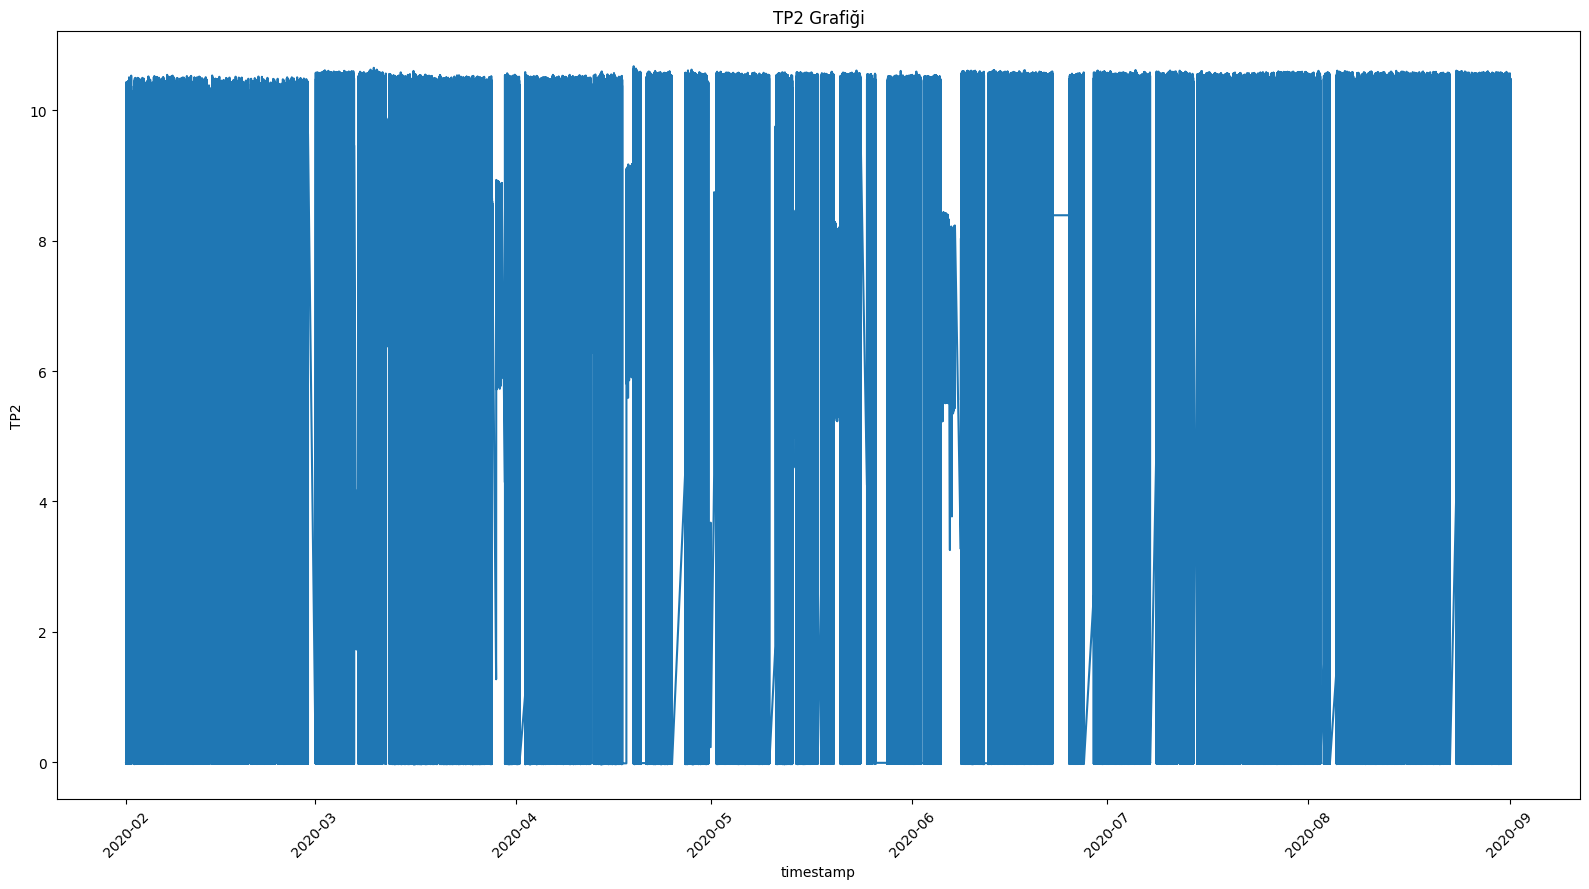

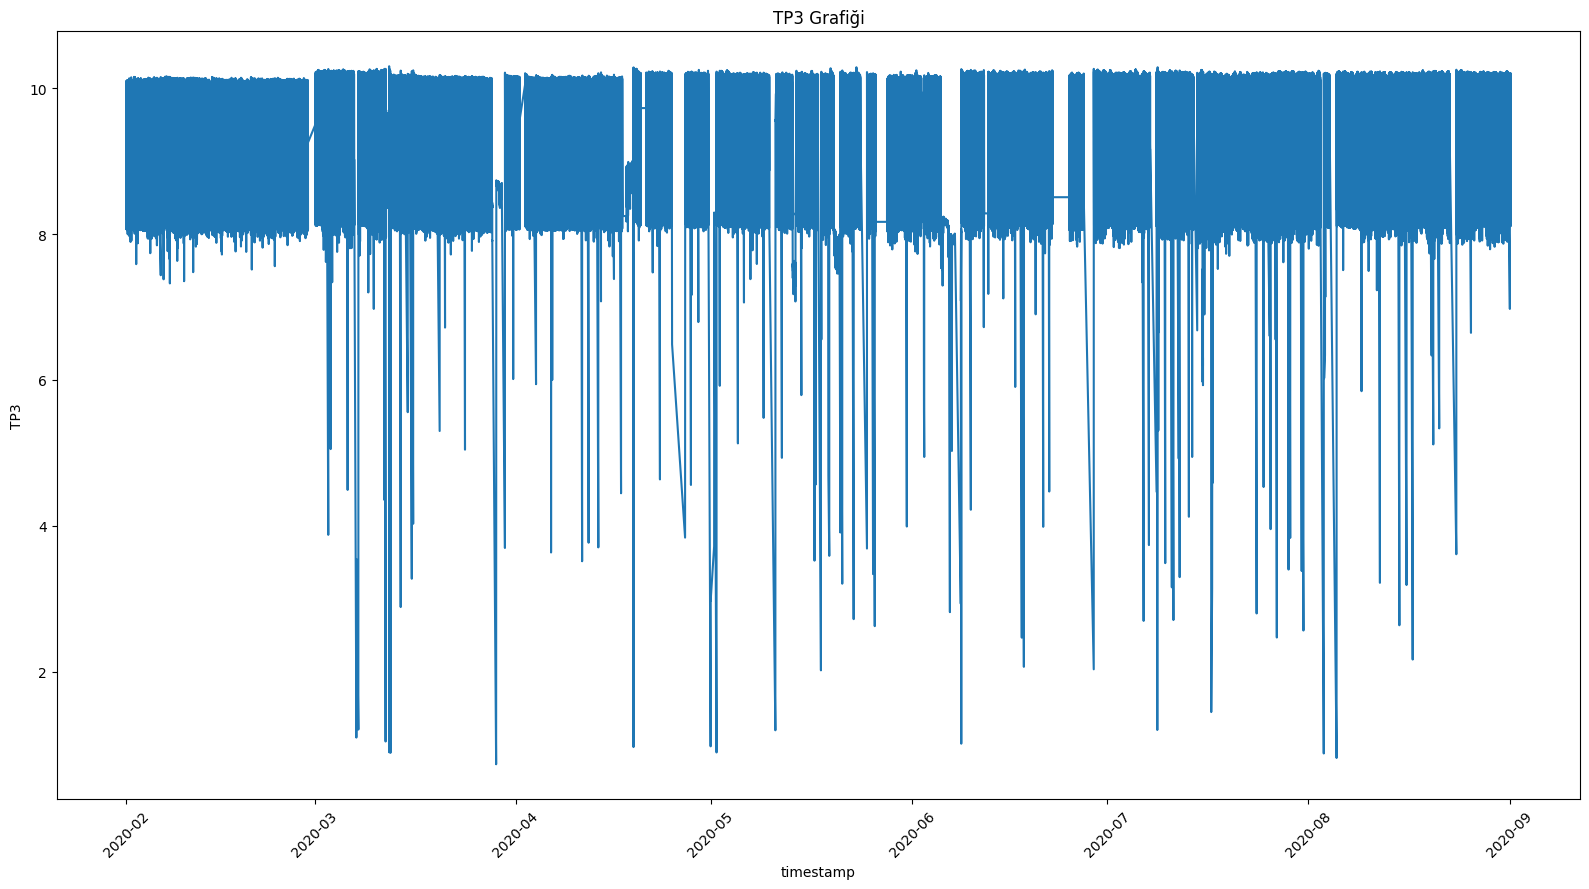

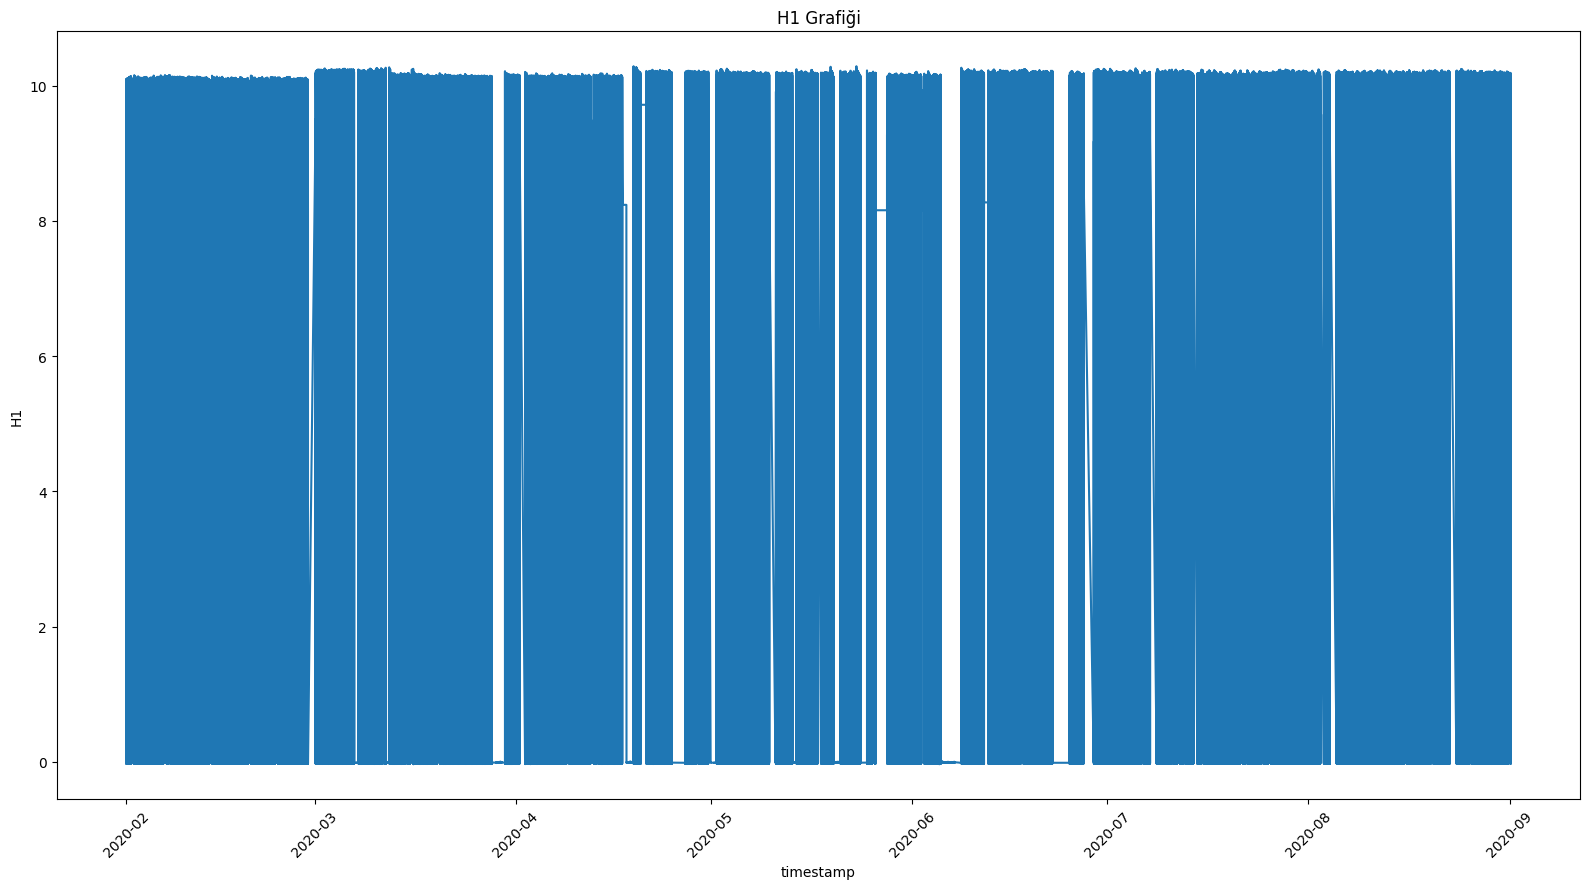

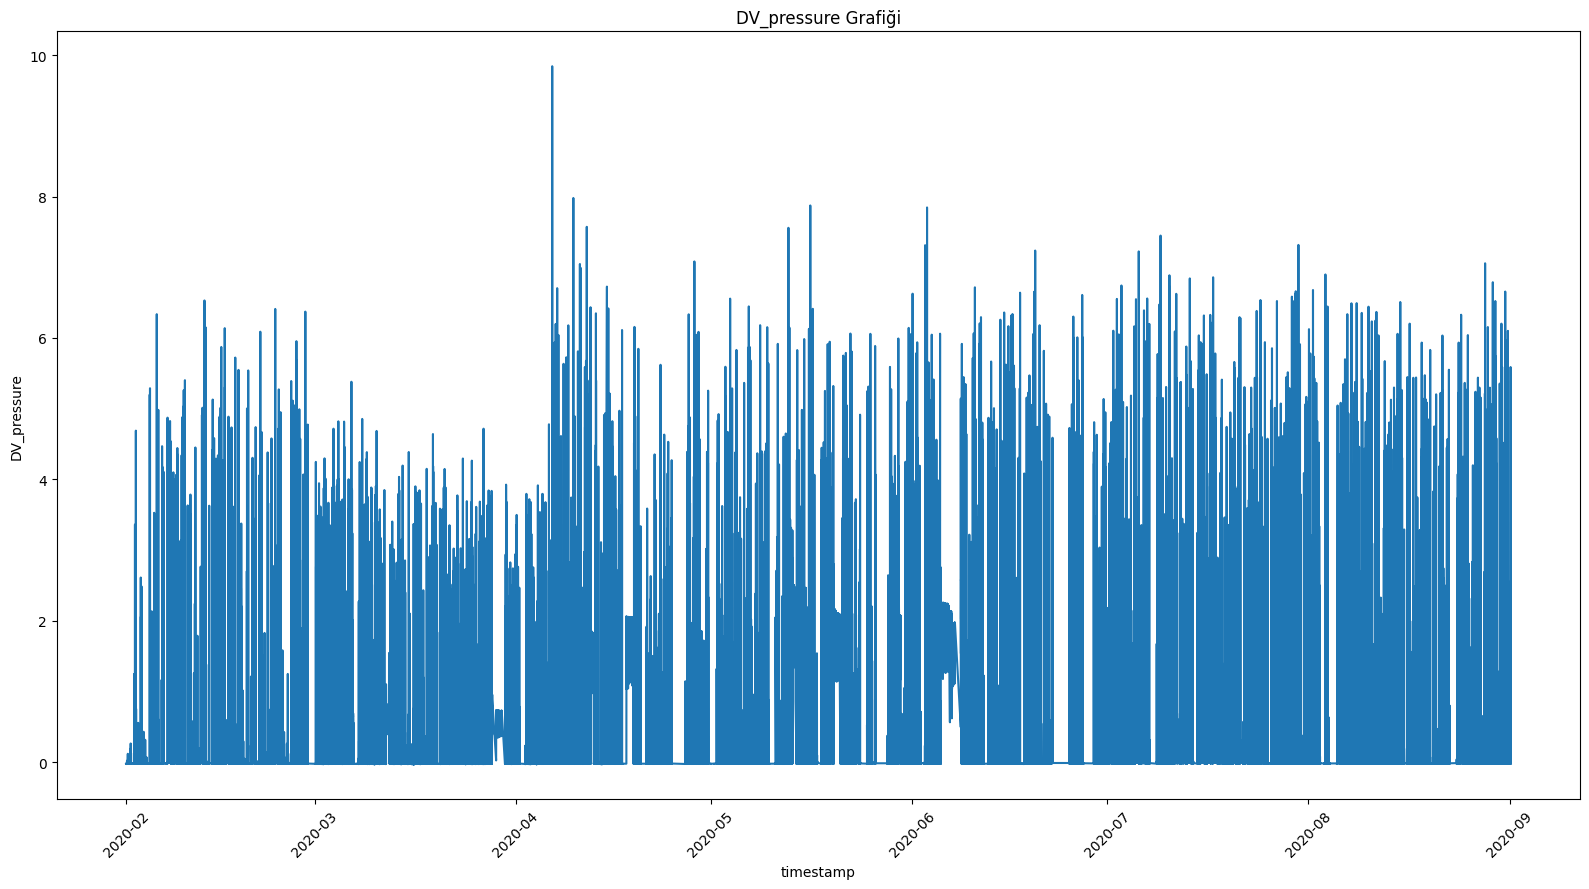

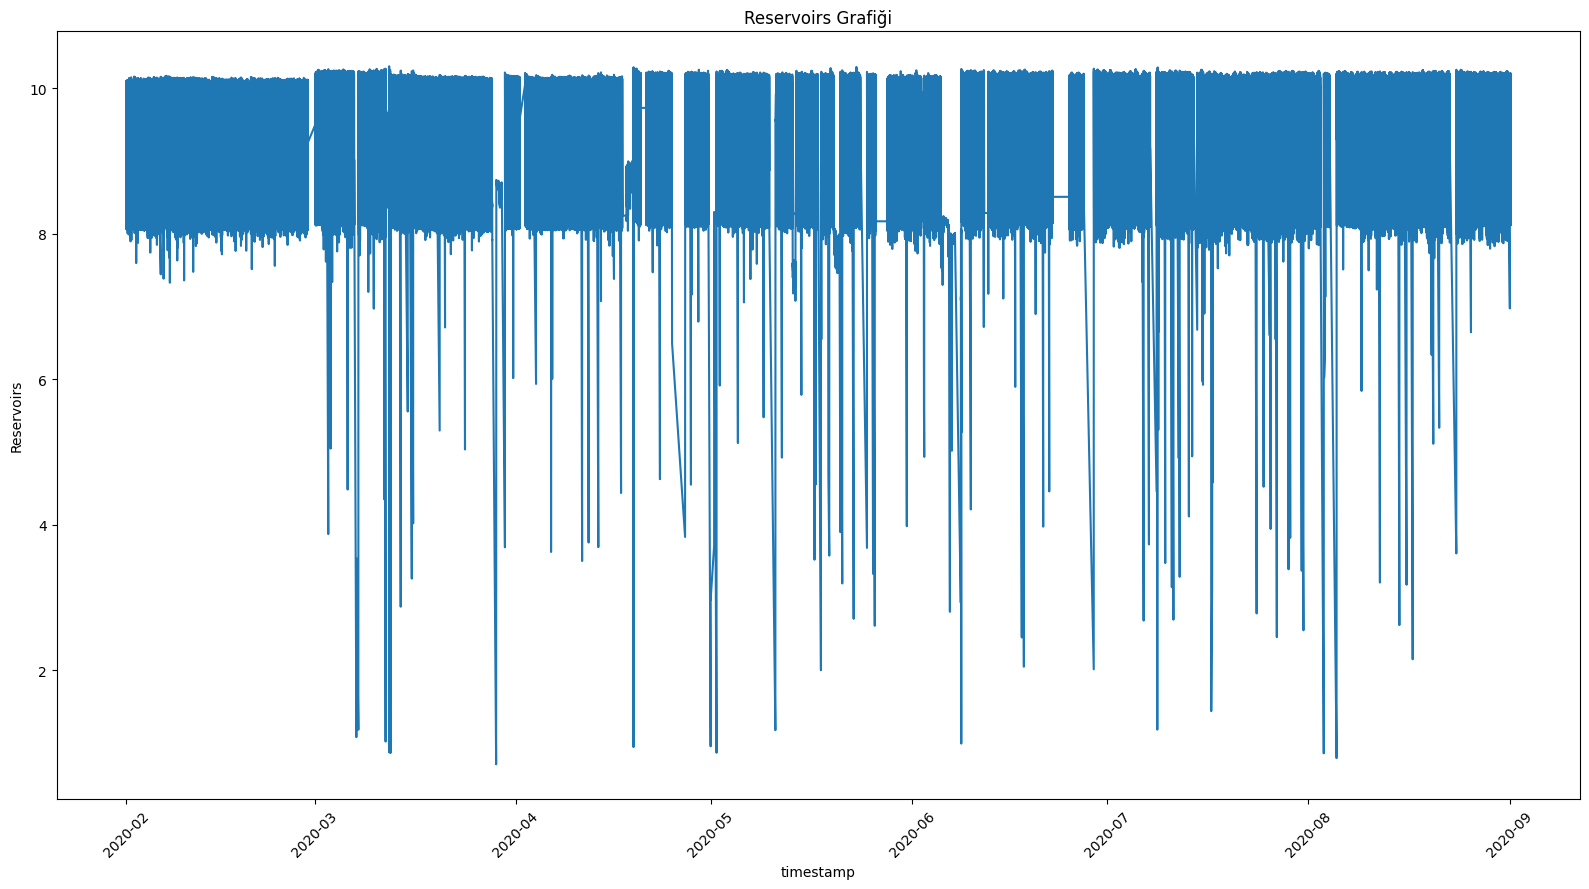

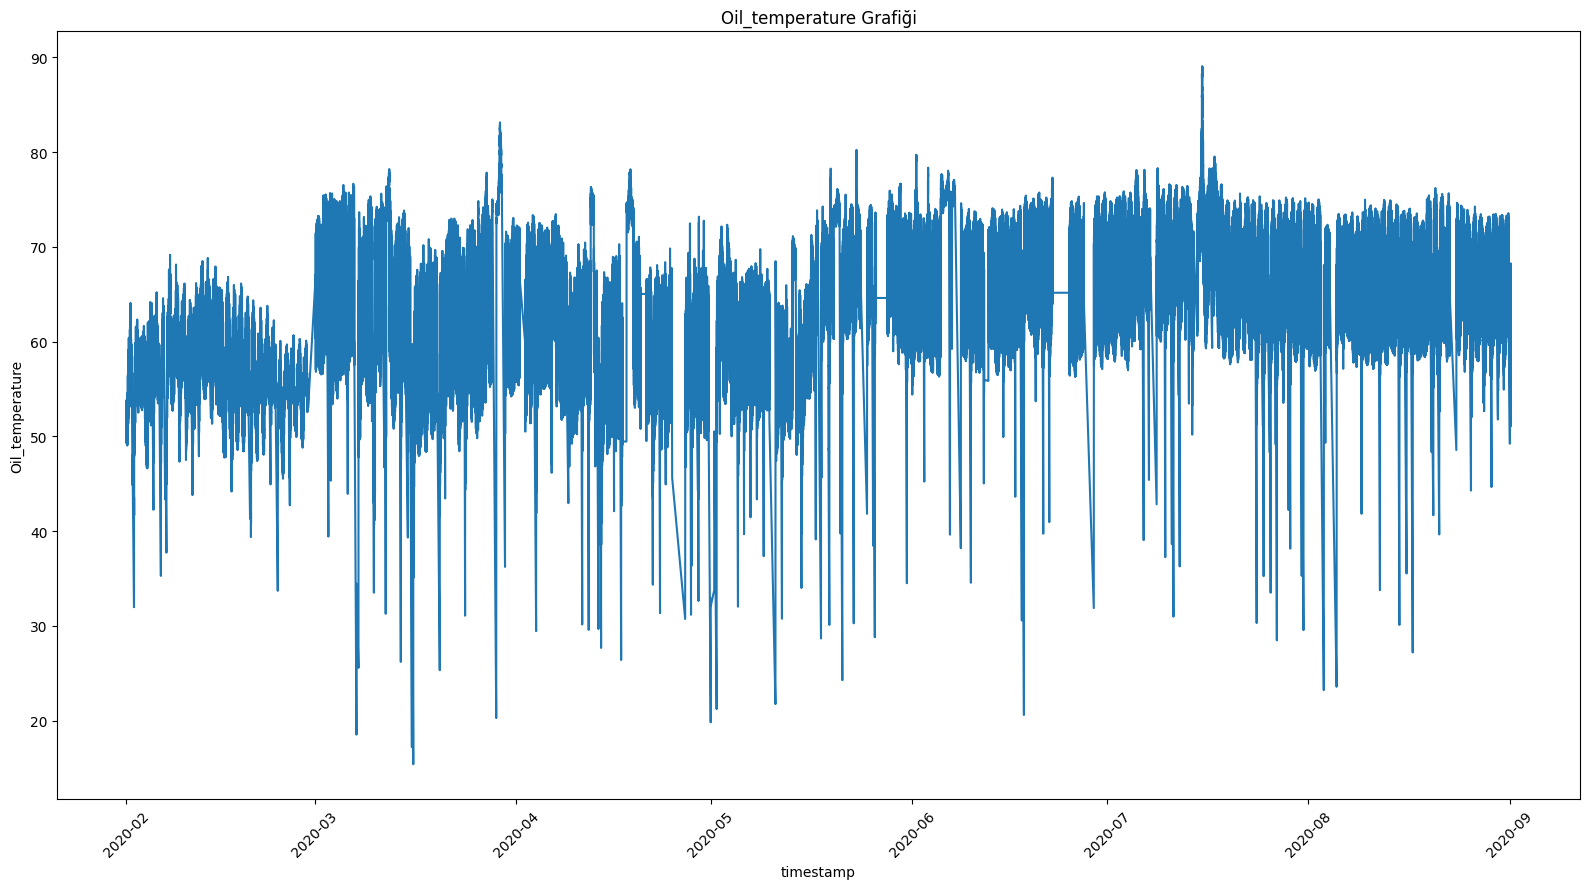

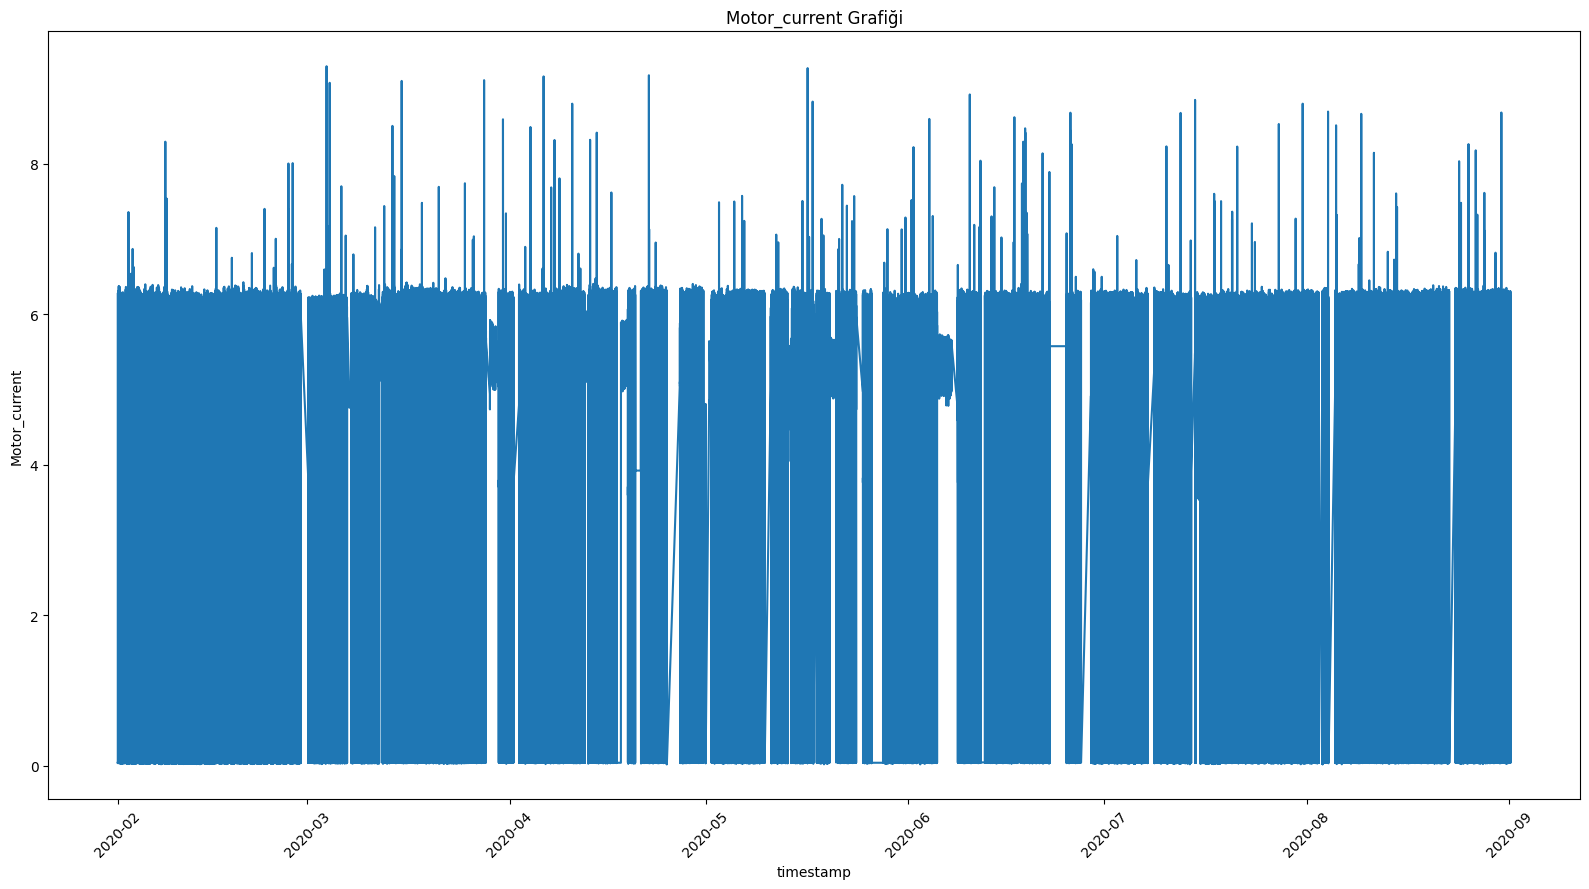

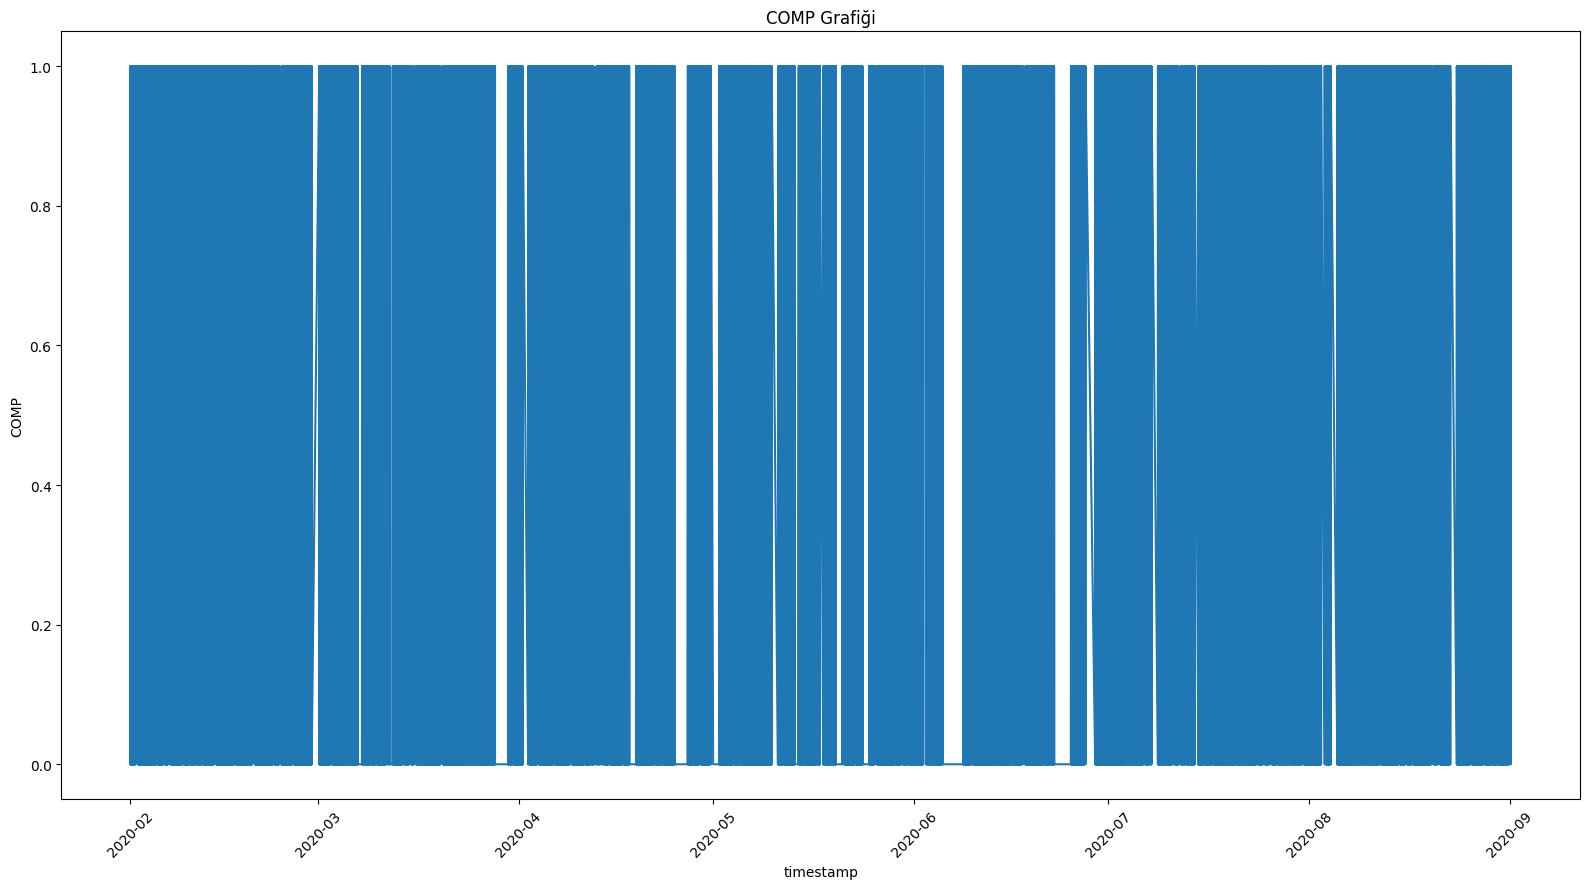

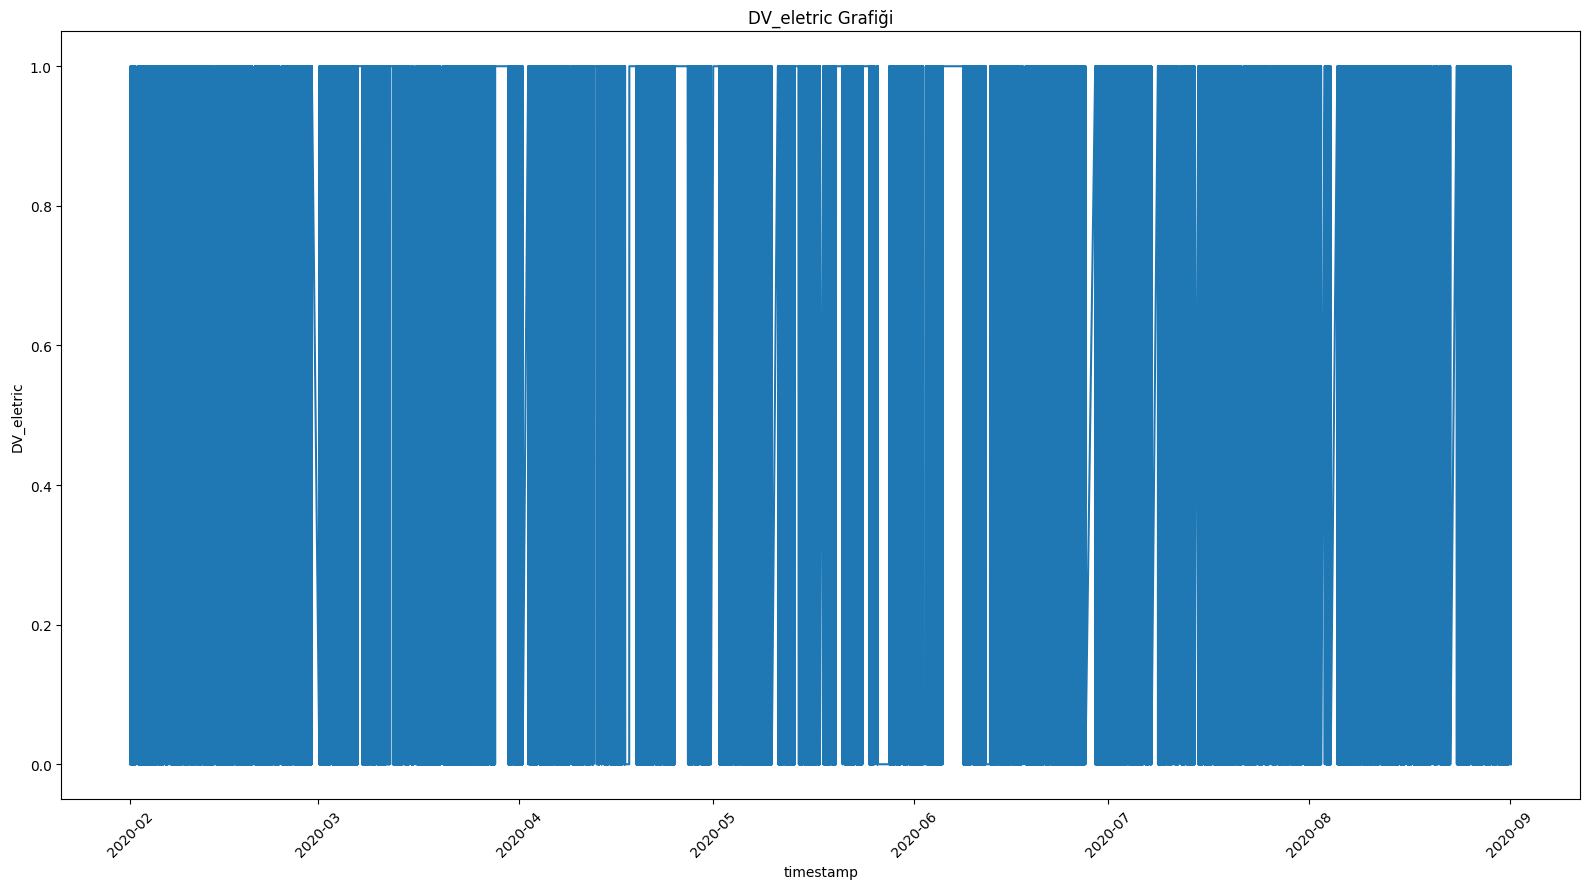

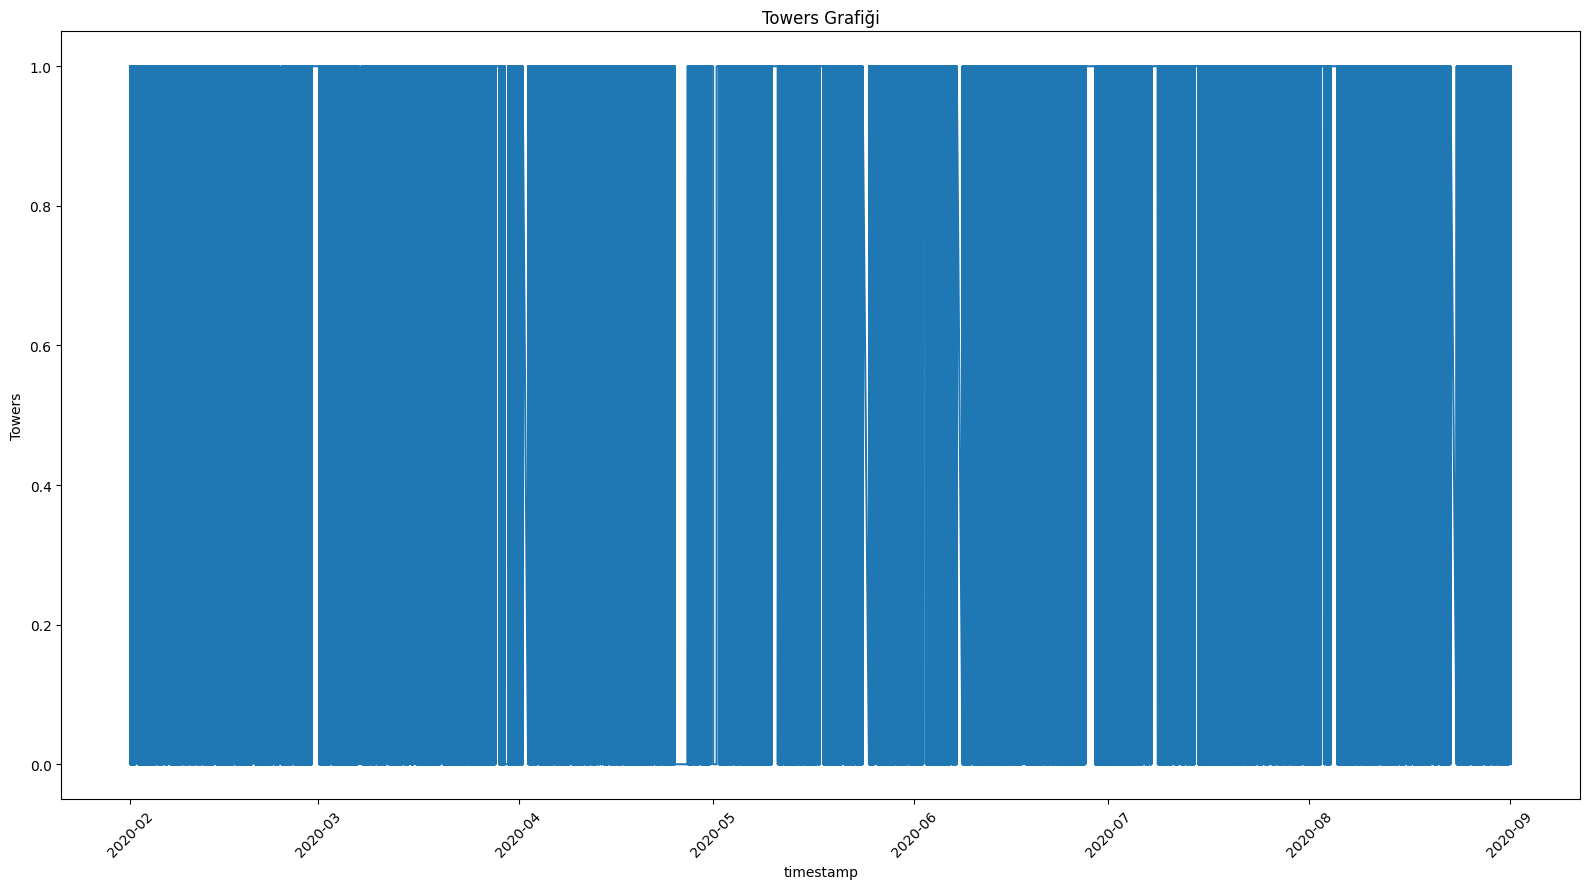

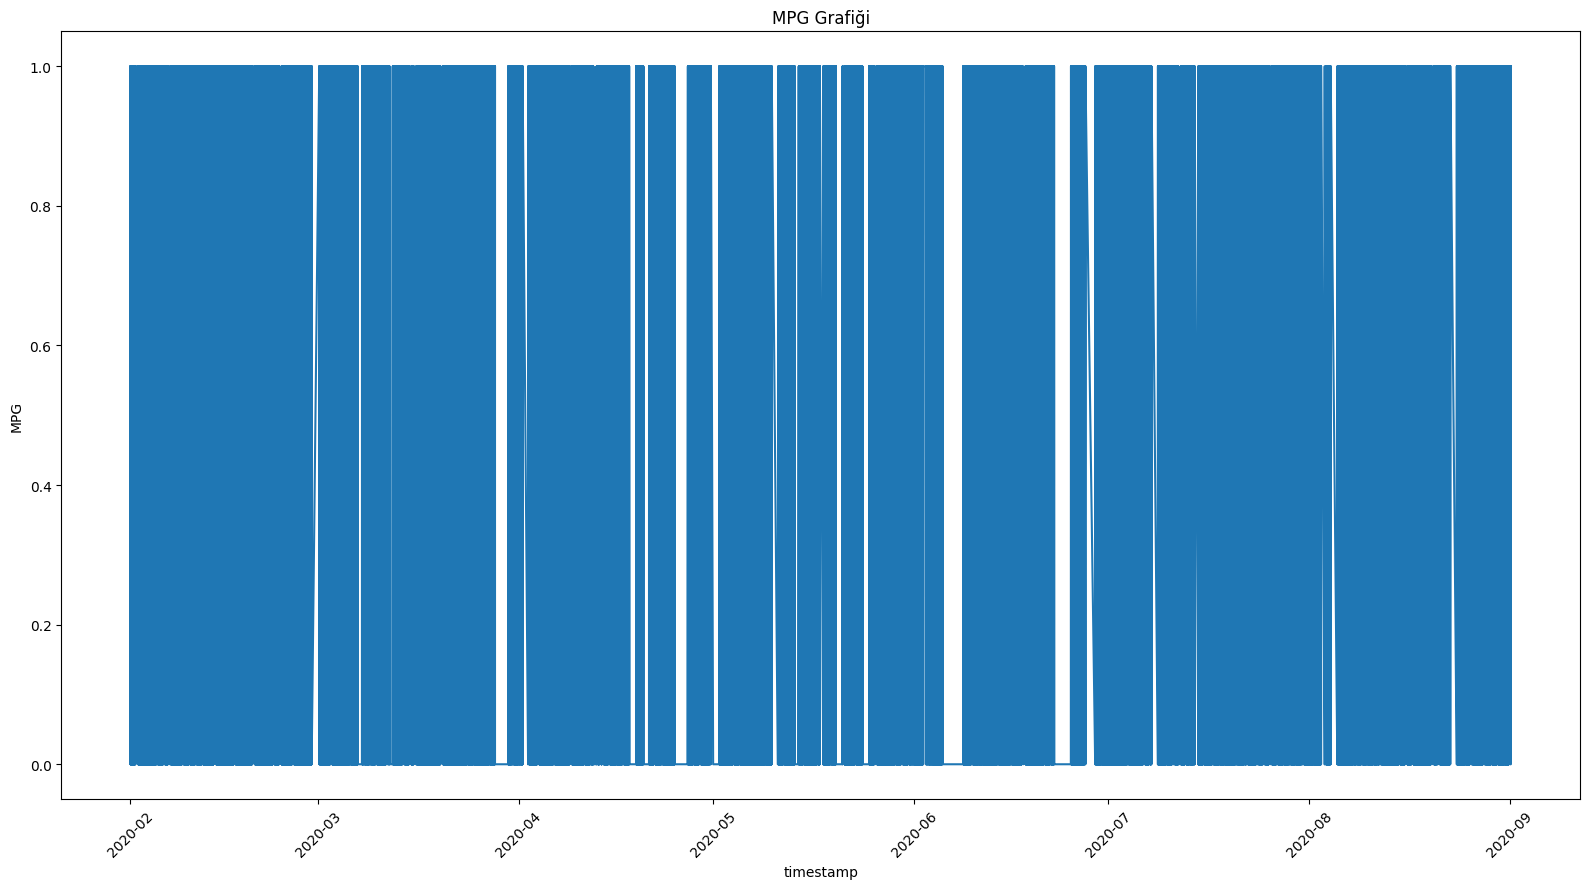

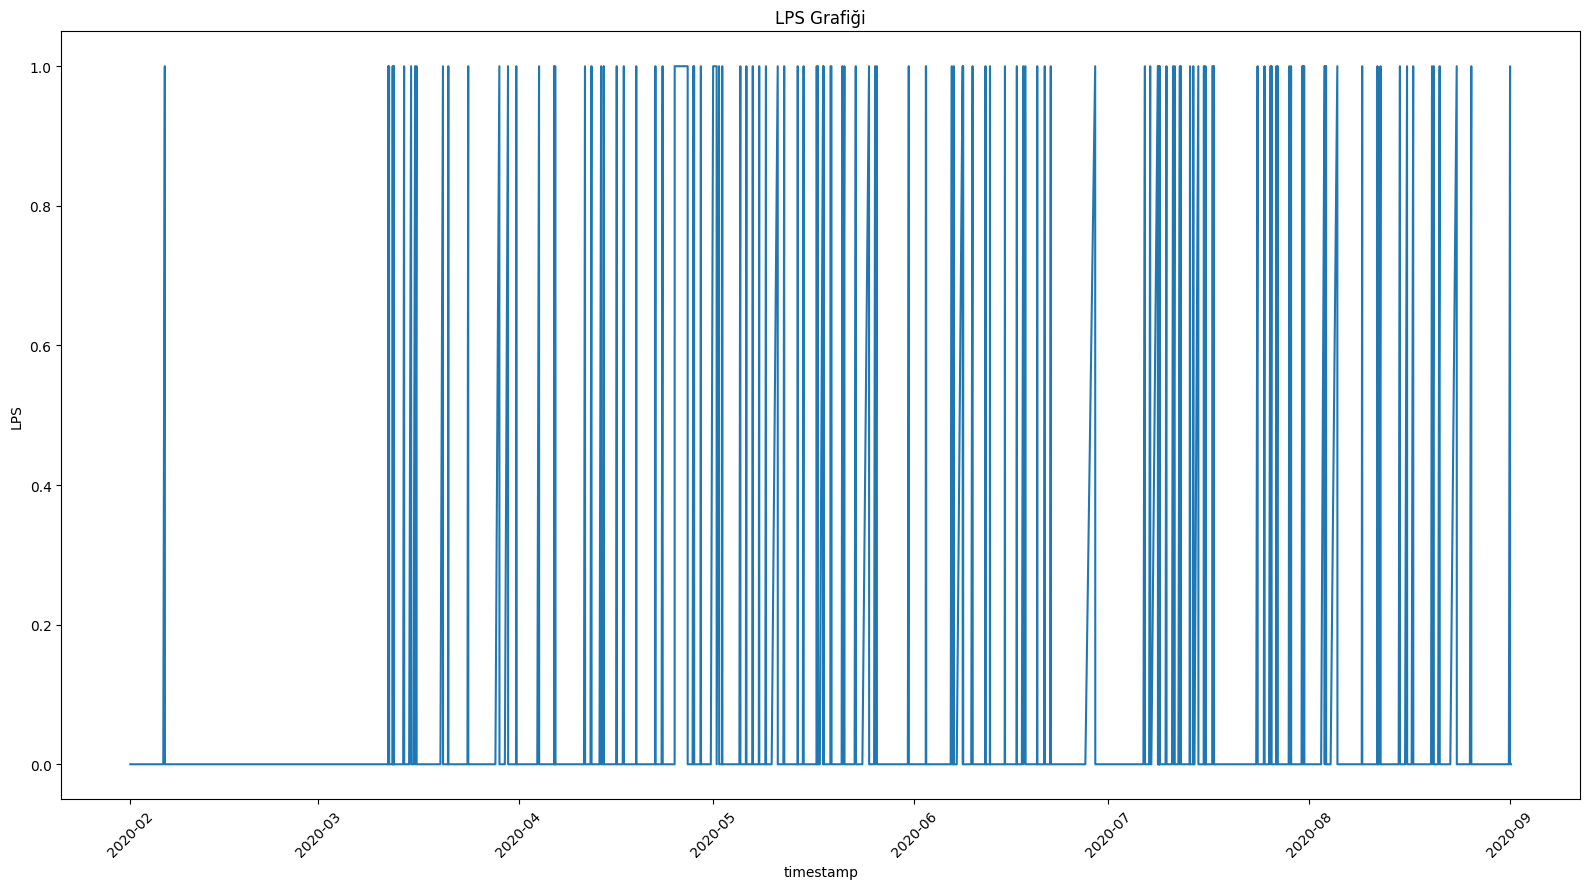

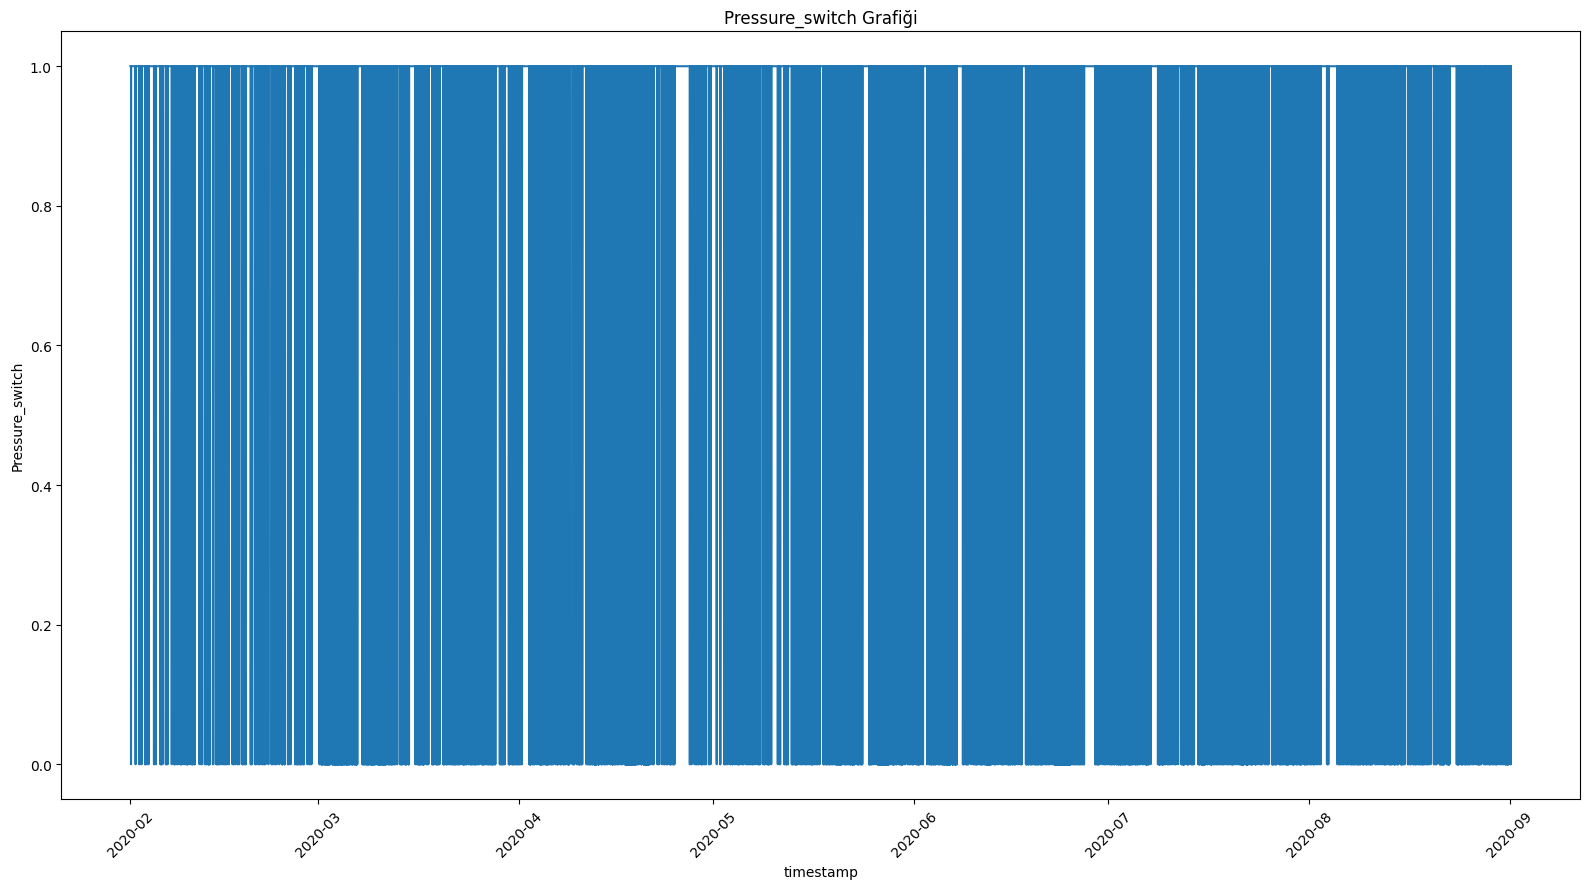

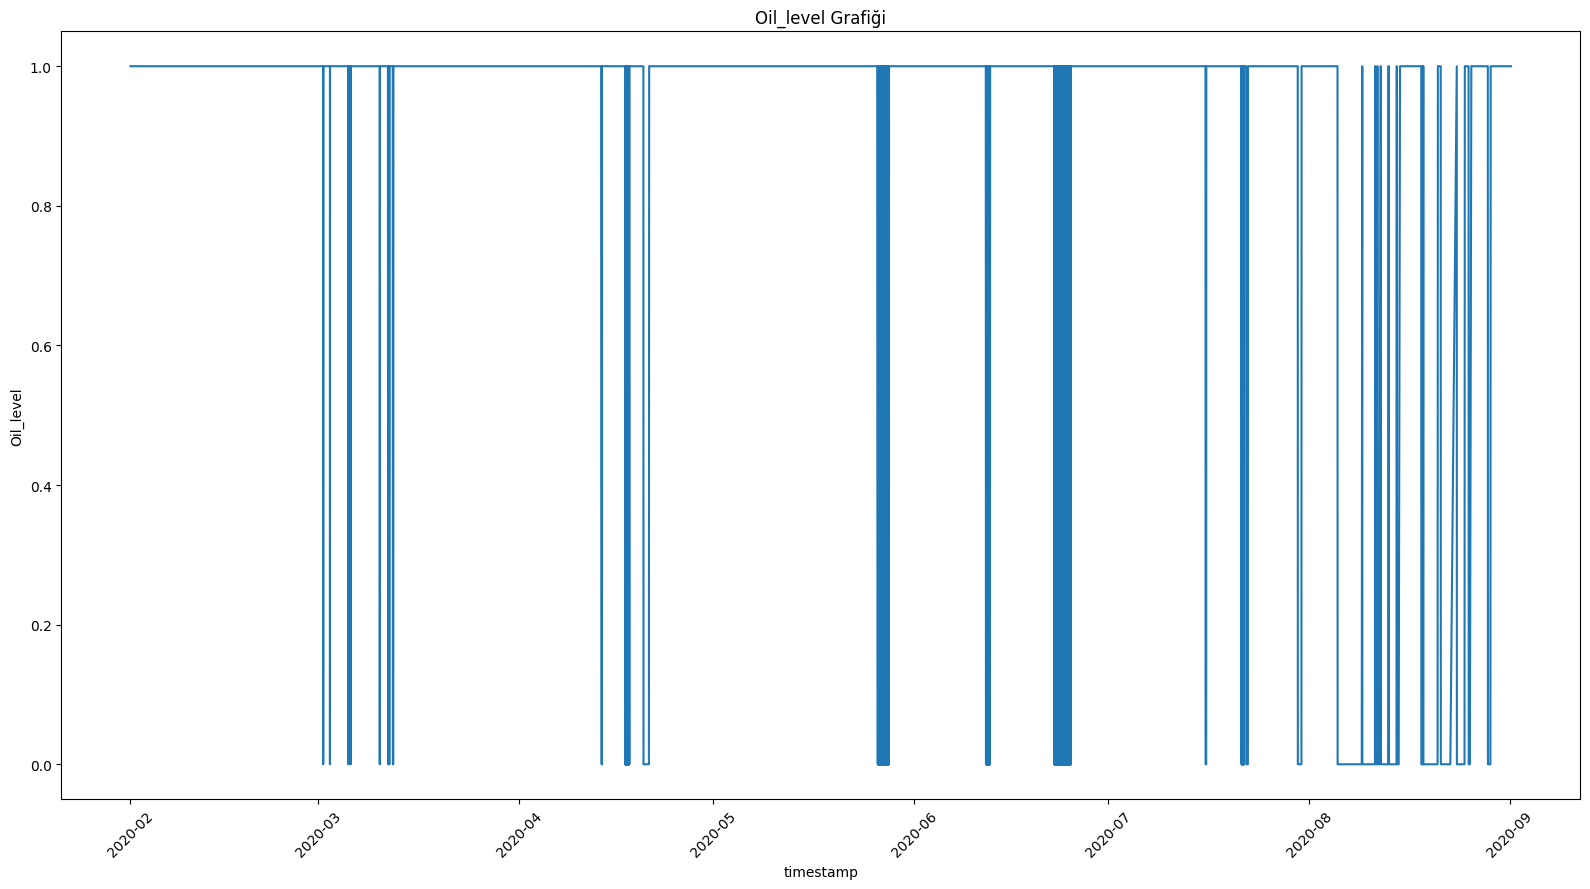

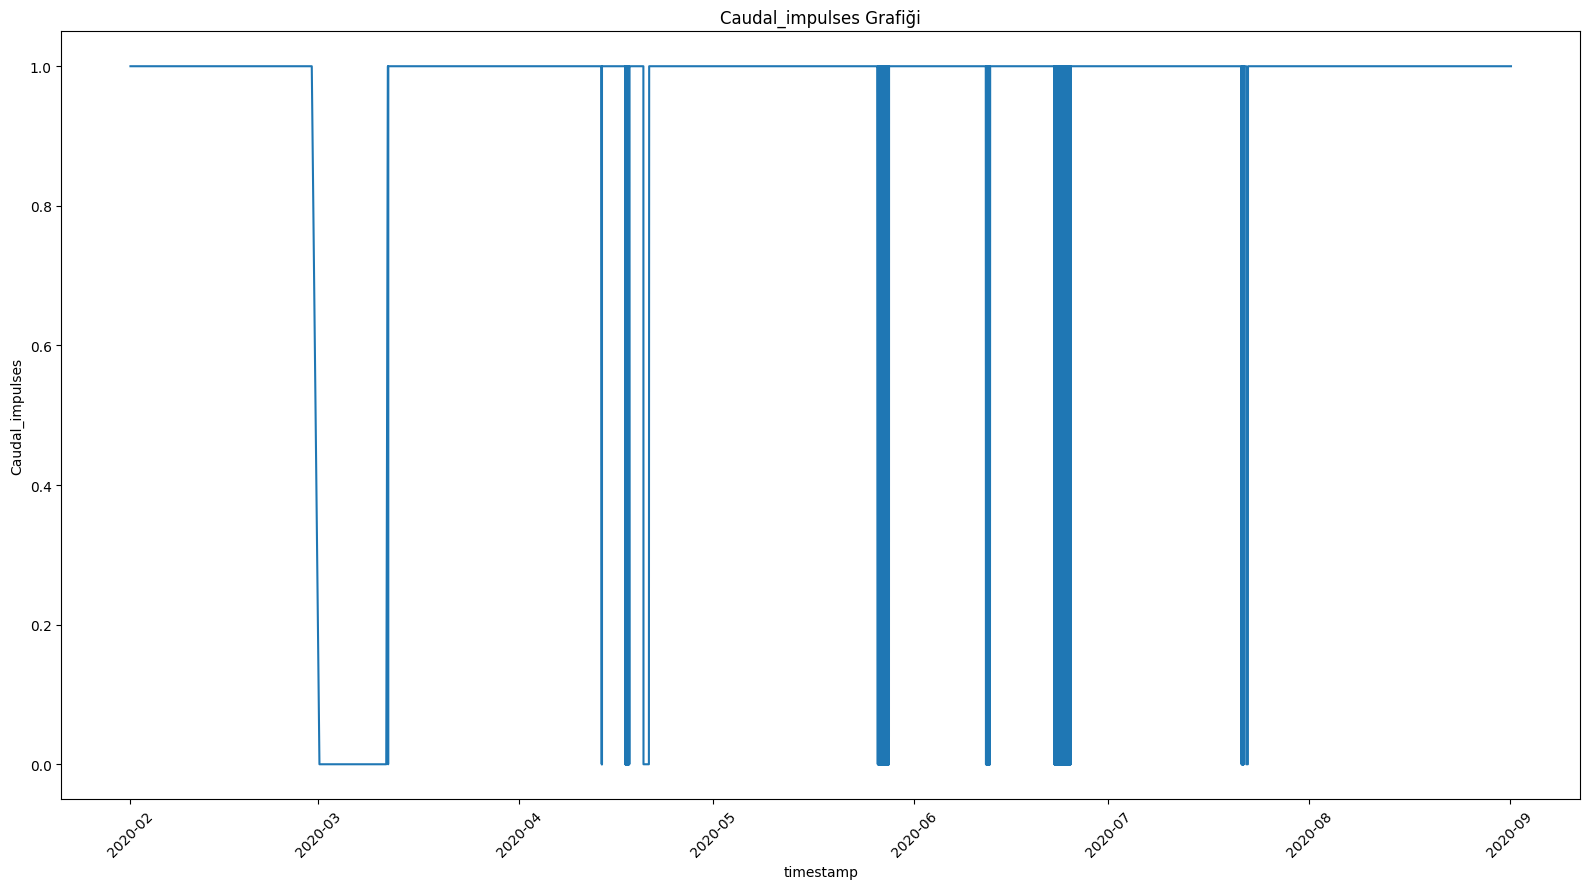

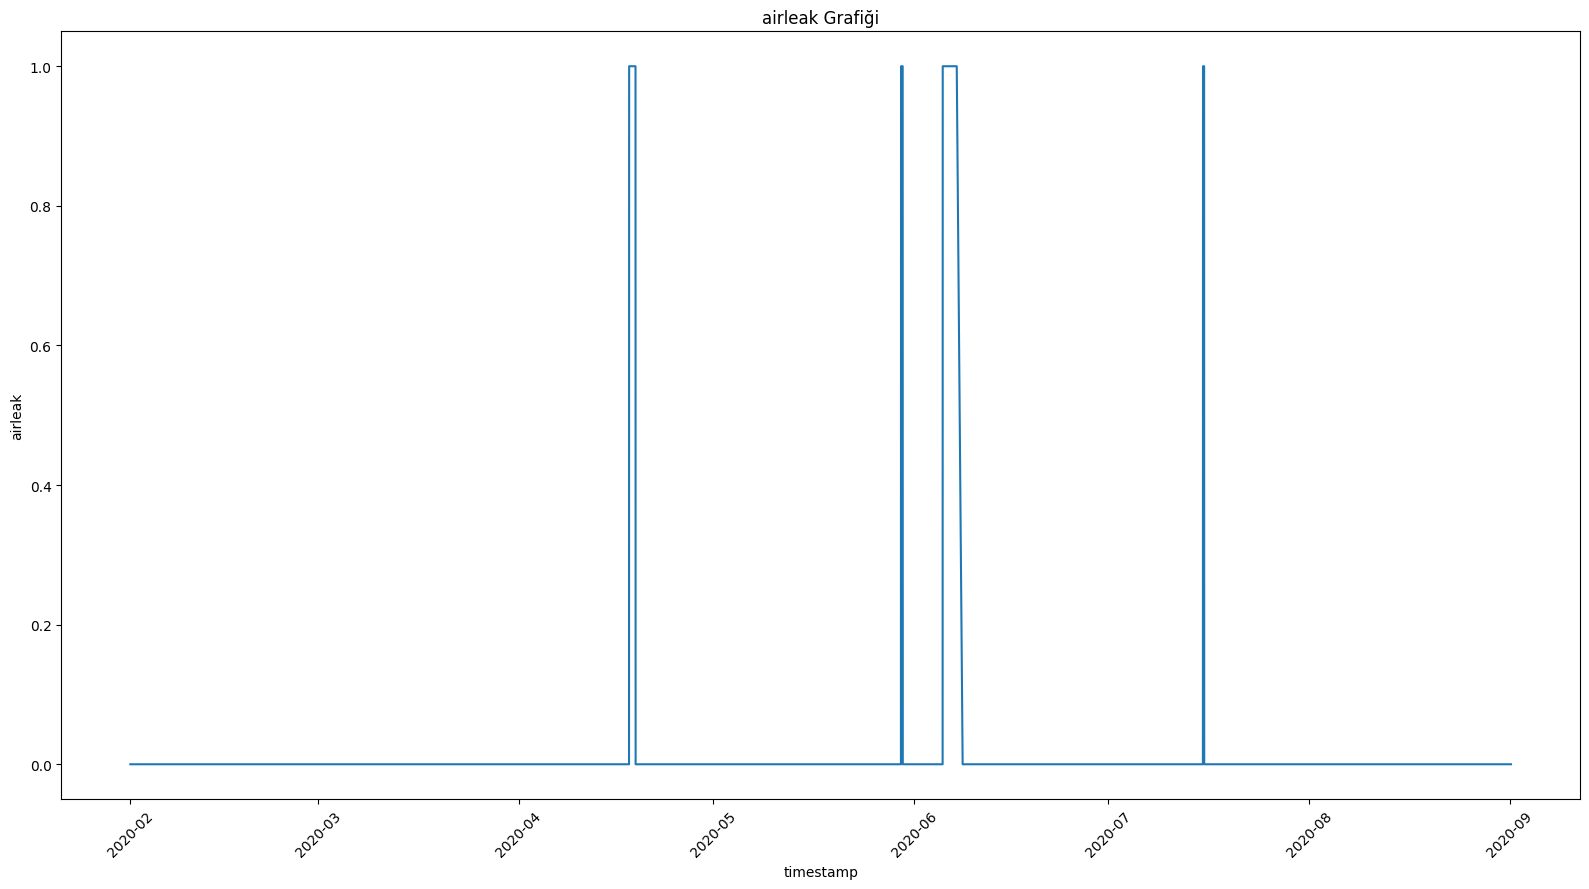

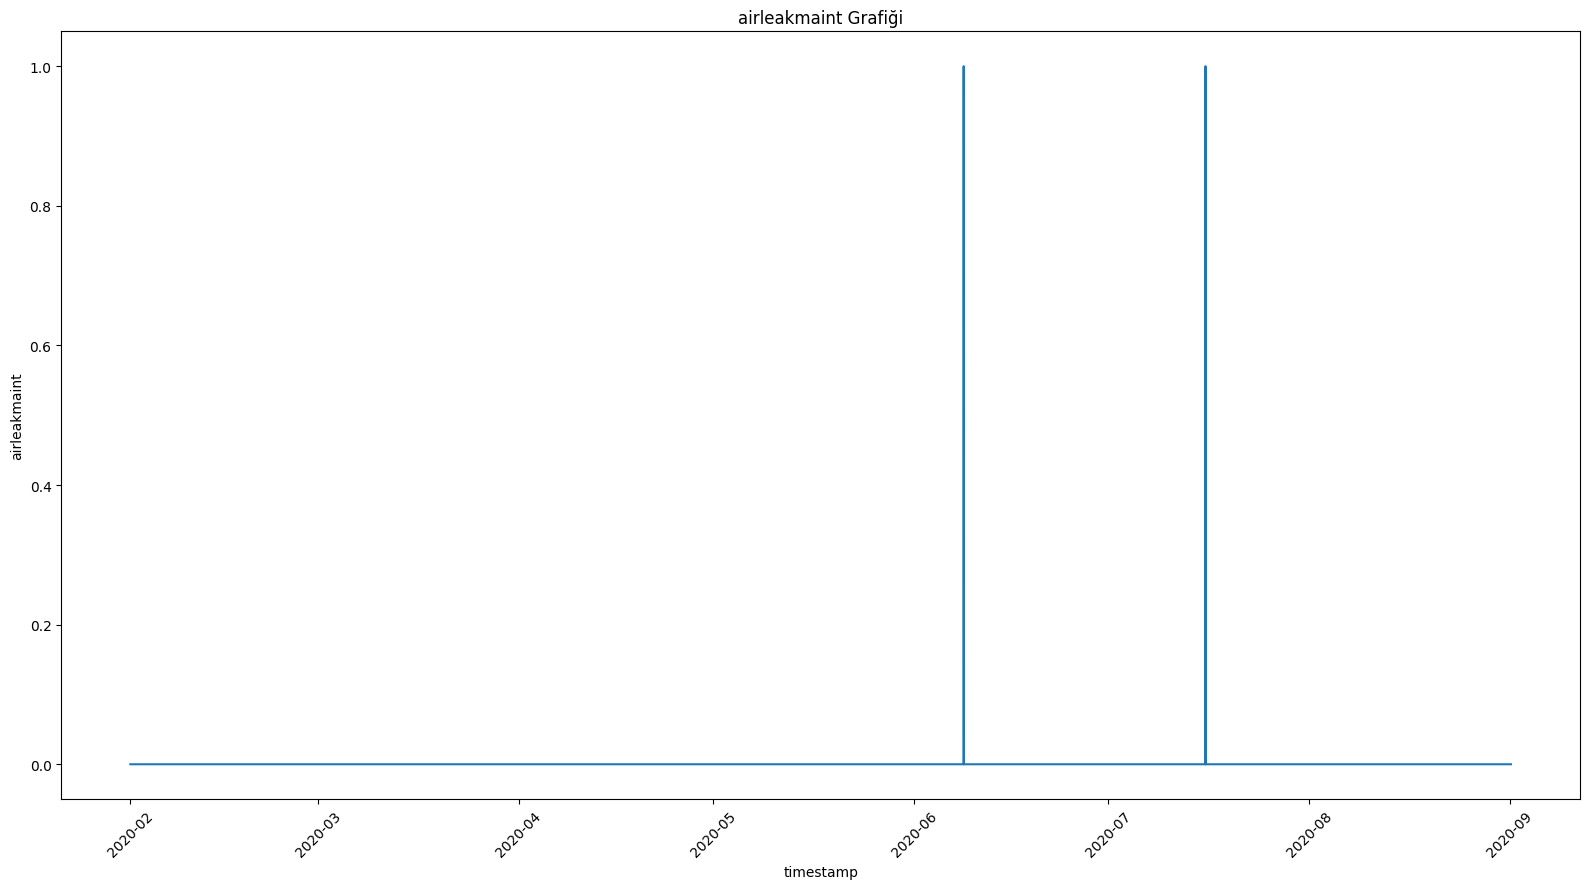

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

numeric_columns = df.select_dtypes(include=[float, int]).columns

for column in numeric_columns:
    plt.figure(figsize=(16, 9))
    plt.plot(df['timestamp'], df[column])
    plt.xlabel('timestamp')
    plt.ylabel(column)
    plt.title(f'{column} Grafiği')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### At the upper cell, seems like "TP3", "DV_pressure","oil tempreture", "motor current" these graph we can use for prediction

#### let's see the data in all timeline

In [ ]:
def plot_maker(df, column_name):
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    start_date = pd.to_datetime('2020-02-01')
    end_date = pd.to_datetime('2020-03-01')
    filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

    plt.figure()
    plt.plot(filtered_df['timestamp'], filtered_df[column_name])
    plt.xlabel('timestamp')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Grafiği (2020-02 - 2020-03)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.figure(figsize=(16, 9))
    plt.show()

def plot_graph(df, date_ranges, highlight_dates, start_date, end_date, column_name):
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]


    plt.figure(figsize=(16, 9))
    plt.plot(filtered_df['timestamp'], filtered_df[column_name])
    plt.xlabel('timestamp')
    plt.ylabel(column_name)
    plt.title(f'{column_name} Grafiği ({start_date.date()} - {end_date.date()})')
    plt.xticks(rotation=45)
    plt.tight_layout()

    for start, end in date_ranges:
        plt.axvspan(start, end, color='orange', alpha=0.3)

    for start, end in highlight_dates:
        plt.axvspan(start, end, color='red', alpha=0.3)

    plt.show()

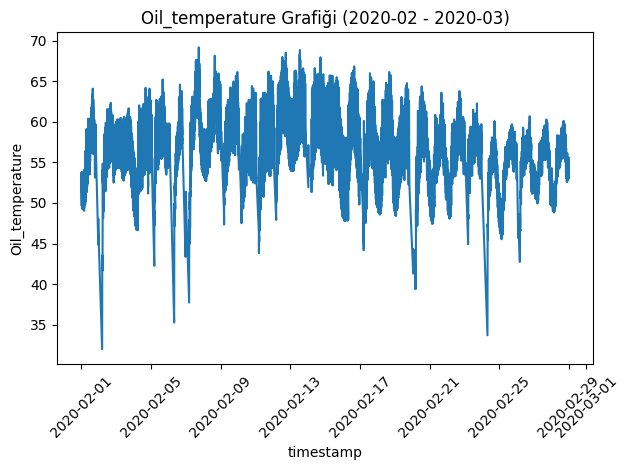

<Figure size 1600x900 with 0 Axes>

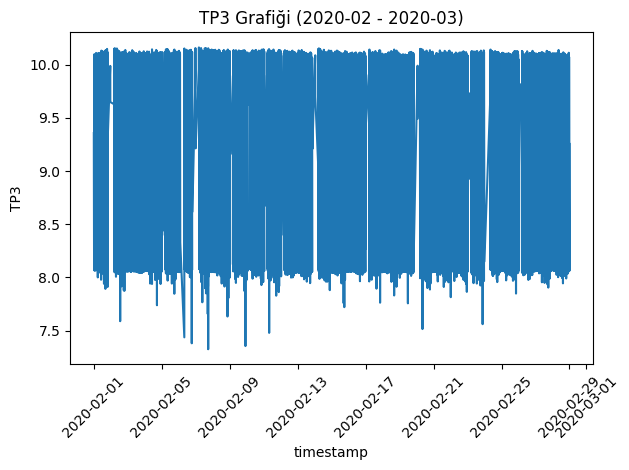

<Figure size 1600x900 with 0 Axes>

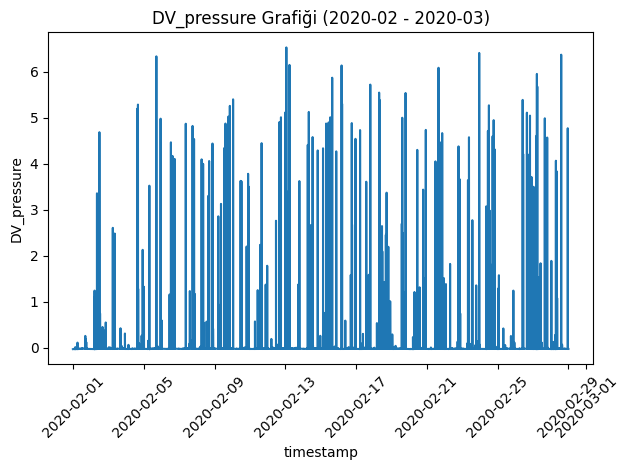

<Figure size 1600x900 with 0 Axes>

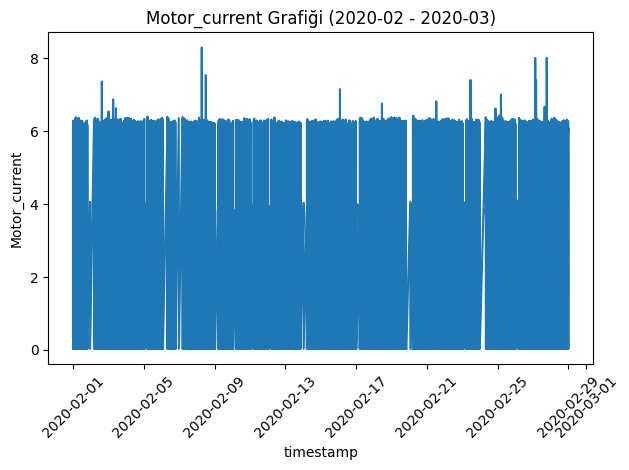

<Figure size 1600x900 with 0 Axes>

In [ ]:
plot_maker(df, 'Oil_temperature')
plot_maker(df, 'TP3')
plot_maker(df, 'DV_pressure')
plot_maker(df, 'Motor_current')

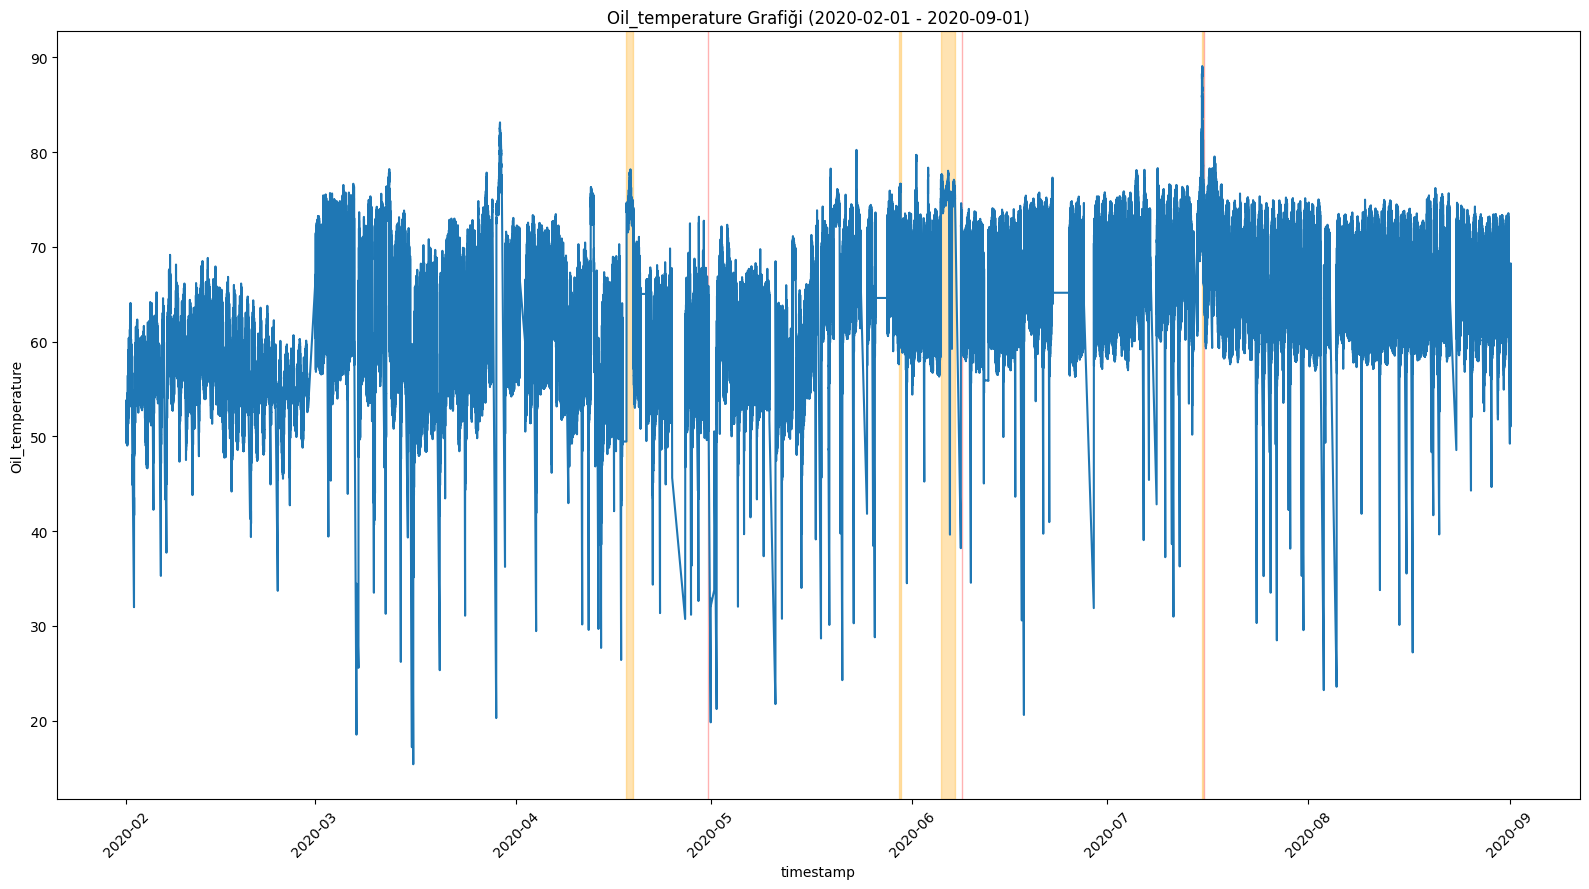

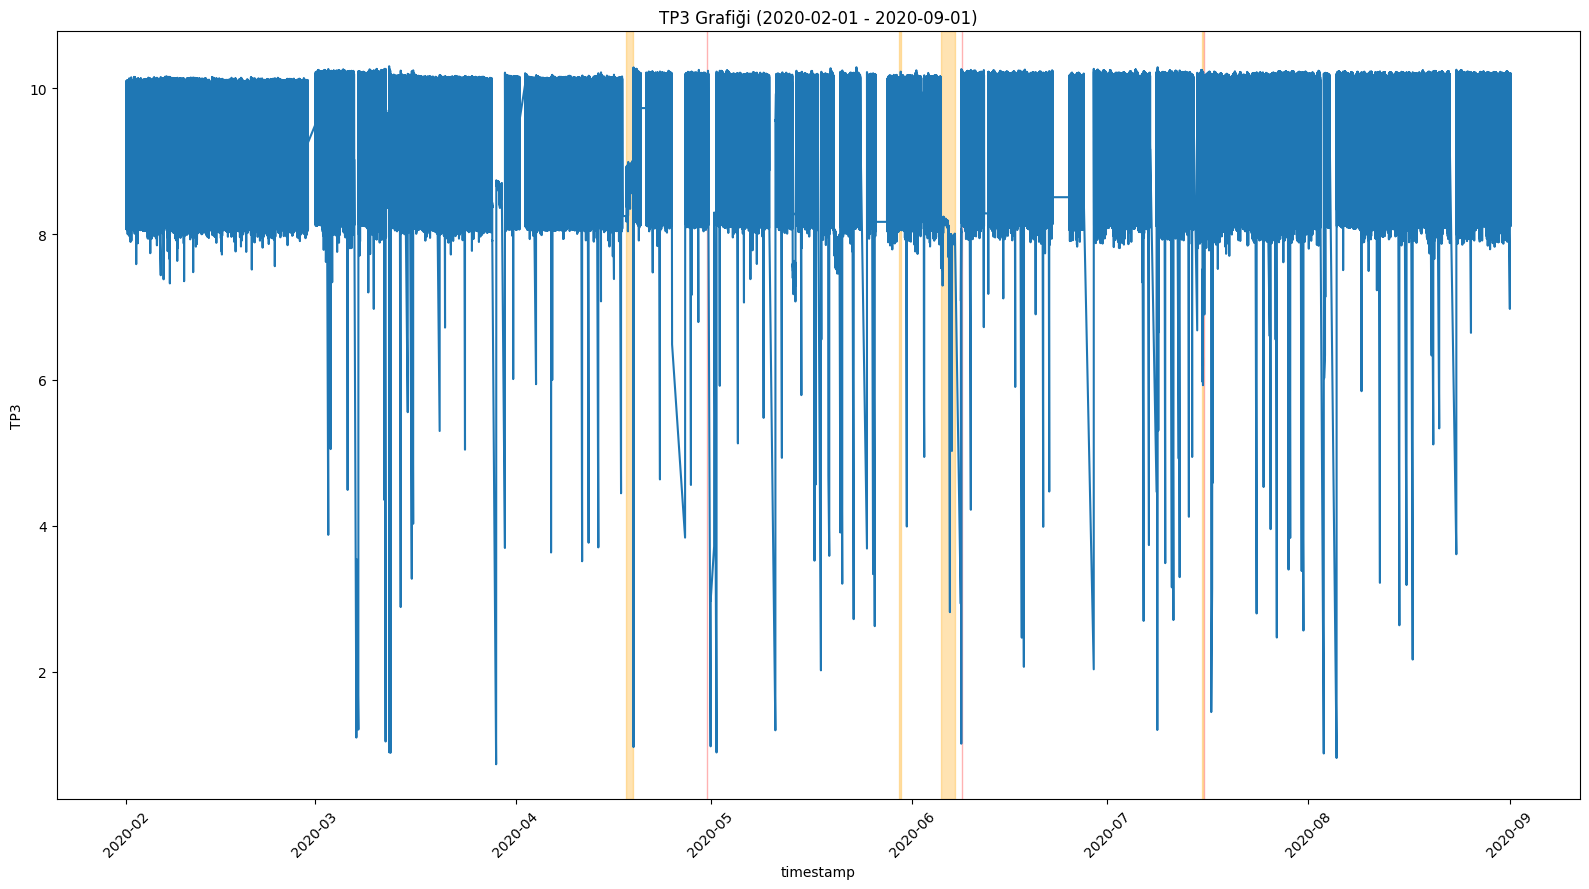

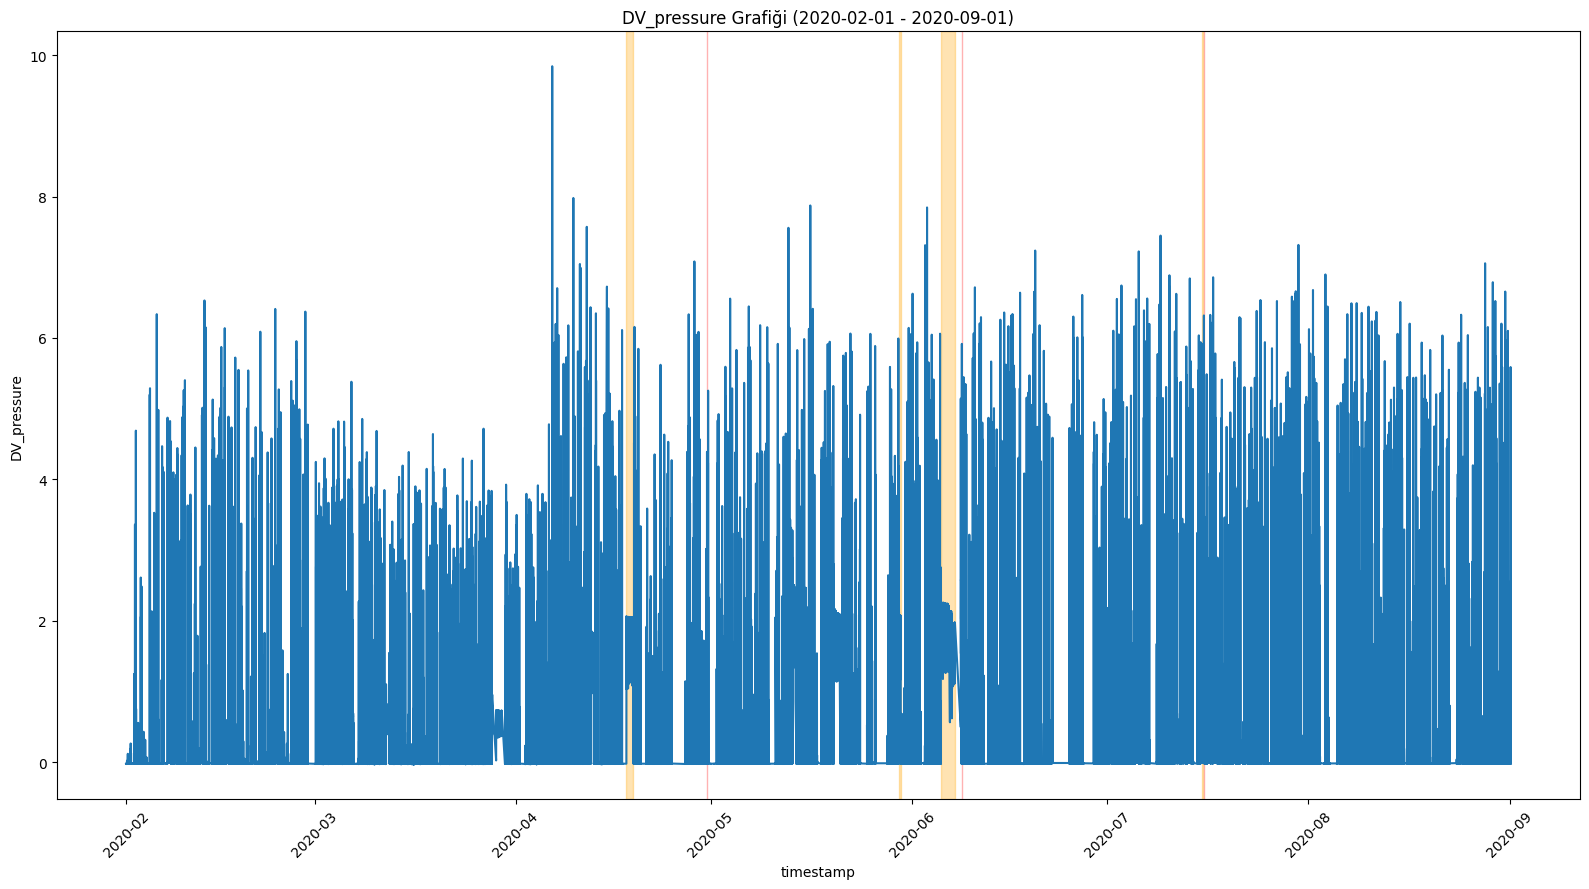

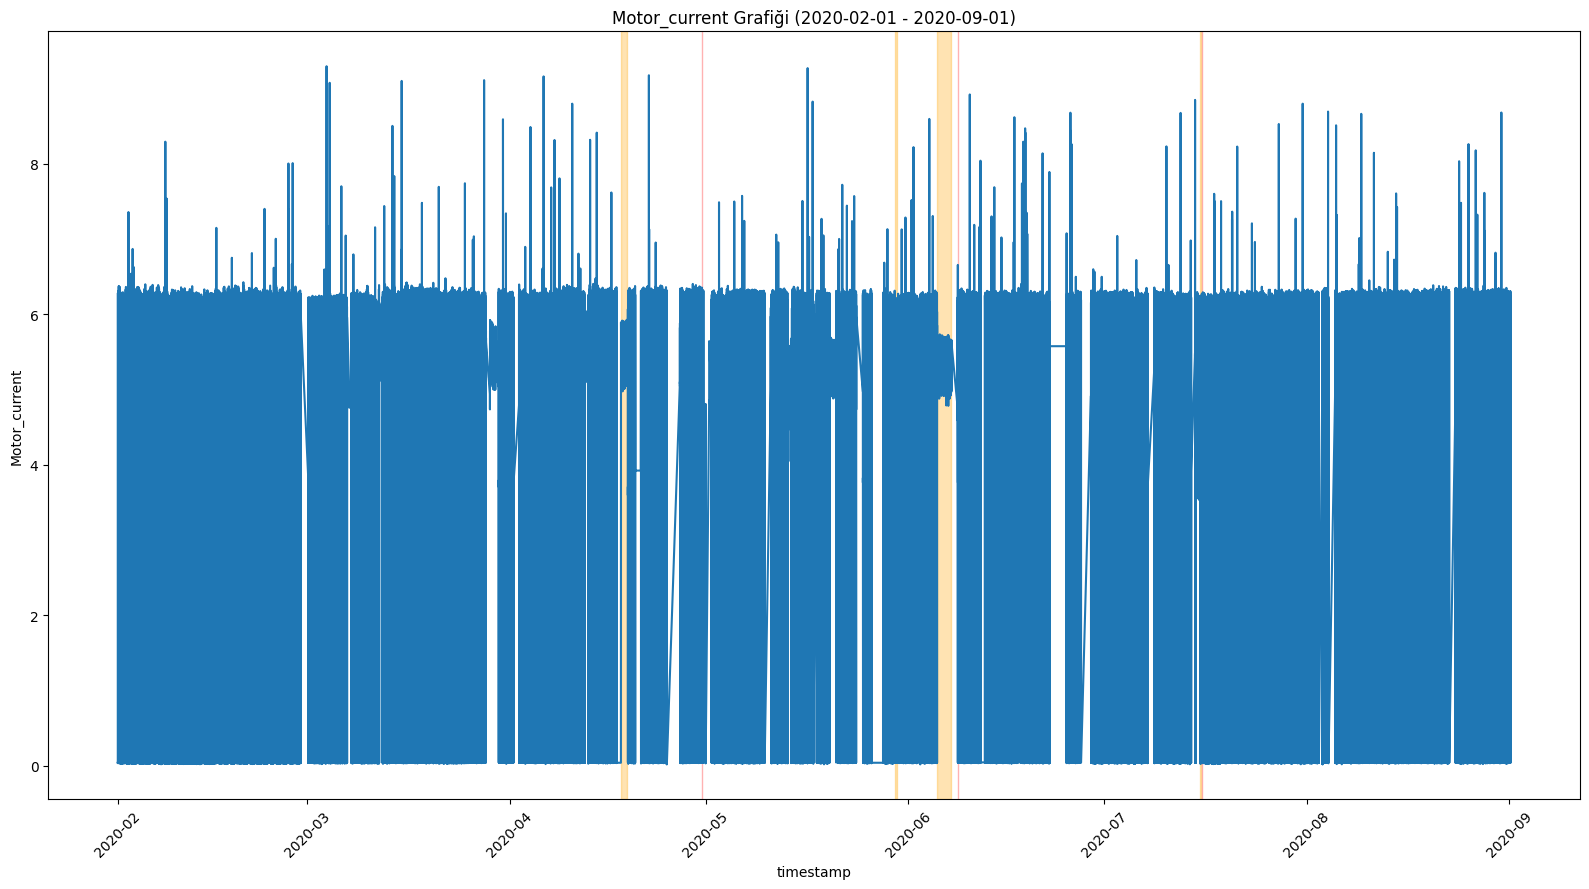

In [ ]:
date_ranges = [
    ('2020-04-18 00:00:00', '2020-04-18 23:59:00'),# bu tarihte yaşanan büyük ihtimalle bir outliner çünkü herhangi bakım yapılmadı
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00'),
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00')
]

highlight_dates = [
    ('2020-04-30 12:00:00', '2020-04-30 12:01:00'),
    ('2020-06-08 16:00:00', '2020-06-08 16:01:00'),
    ('2020-07-16 00:00:00', '2020-07-16 00:01:00')
]

start_date = pd.to_datetime('2020-02-01 00:00:00')
end_date = pd.to_datetime('2020-09-01 03:59:50')

plot_graph(df, date_ranges, highlight_dates, start_date, end_date,'Oil_temperature')
plot_graph(df, date_ranges, highlight_dates, start_date, end_date,'TP3')
plot_graph(df, date_ranges, highlight_dates, start_date, end_date,'DV_pressure')
plot_graph(df, date_ranges, highlight_dates, start_date, end_date,'Motor_current')

#### Now we can see the data at the specific timeline

In [ ]:
airleak_date_specific1 = [
     ('2020-04-18 00:00:00', '2020-04-18 23:59:00')

]
airleak_maint_date_specific1 = [
    ('2020-04-30 12:00:00', '2020-04-30 12:01:00')
]
start_date_spec1 = pd.to_datetime('2020-04-08 00:00:00')
end_date_spec1 = pd.to_datetime('2020-05-10 00:00:00')

plot_graph(df, airleak_date_specific1, airleak_maint_date_specific1, start_date_spec1, end_date_spec1,'Oil_temperature')
plot_graph(df, airleak_date_specific1, airleak_maint_date_specific1, start_date_spec1, end_date_spec1,'TP3')
plot_graph(df, airleak_date_specific1, airleak_maint_date_specific1, start_date_spec1, end_date_spec1,'DV_pressure')
plot_graph(df, airleak_date_specific1, airleak_maint_date_specific1, start_date_spec1, end_date_spec1,'Motor_current')

In [ ]:
airlea_date_specific2 = [
    ('2020-05-29 23:30:00', '2020-05-30 06:00:00'),
    ('2020-06-05 10:00:00', '2020-06-07 14:30:00')
]
airleak_maint_date_specific2 = [
    ('2020-06-08 16:00:00', '2020-06-08 16:01:00')
]
start_date_spec2 = pd.to_datetime('2020-05-20 00:00:00')
end_date_spec2 = pd.to_datetime('2020-06-20 03:59:50')

plot_graph(df, airlea_date_specific2, airleak_maint_date_specific2, start_date_spec2, end_date_spec2,'Oil_temperature')
plot_graph(df, airlea_date_specific2, airleak_maint_date_specific2, start_date_spec2, end_date_spec2,'TP3')
plot_graph(df, airlea_date_specific2, airleak_maint_date_specific2, start_date_spec2, end_date_spec2,'DV_pressure')
plot_graph(df, airlea_date_specific2, airleak_maint_date_specific2, start_date_spec2, end_date_spec2,'Motor_current')

In [1]:
airlea_date_specific3 = [
    ('2020-07-15 14:30:00', '2020-07-15 19:00:00')
]
airleak_maint_date_specific3 = [

    ('2020-07-16 00:00:00', '2020-07-16 00:01:00')
]
start_date_spec3 = pd.to_datetime('2020-07-05 00:00:00')
end_date_spec3 = pd.to_datetime('2020-07-26 03:59:50')

plot_graph(df, airlea_date_specific3, airleak_maint_date_specific3, start_date_spec3, end_date_spec3,'Oil_temperature')
plot_graph(df, airlea_date_specific3, airleak_maint_date_specific3, start_date_spec3, end_date_spec3,'TP3')
plot_graph(df, airlea_date_specific3, airleak_maint_date_specific3, start_date_spec3, end_date_spec3,'DV_pressure')
plot_graph(df, airlea_date_specific3, airleak_maint_date_specific3, start_date_spec3, end_date_spec3,'Motor_current')

NameError: ignored